In [2]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
data_dir = r"C:/Users/akshi/OneDrive/Desktop/PRODIGY/PRODIGY_ML_04/data"  
img_size = 128

# Verify the directory
if os.path.exists(data_dir) and os.path.isdir(data_dir):
    classes = os.listdir(data_dir)
    num_classes = len(classes)
    print("Classes:", classes)
else:
    print("Invalid directory:", data_dir)


Classes: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [4]:
def load_data(data_dir, img_size):
    data = []
    labels = []
    for idx, class_name in enumerate(classes):
        class_folder = os.path.join(data_dir, class_name)
        print(f"Loading class: {class_name}")
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            img = cv2.resize(img, (img_size, img_size))  
            data.append(img)
            labels.append(idx)  
    return np.array(data), np.array(labels)

X, y = load_data(data_dir, img_size)

X = X / 255.0  
X = X.reshape(-1, img_size, img_size, 1) 
y = to_categorical(y, num_classes)

print("Dataset loaded!")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Loading class: 01_palm
Loading class: 02_l
Loading class: 03_fist
Loading class: 04_fist_moved
Loading class: 05_thumb
Loading class: 06_index
Loading class: 07_ok
Loading class: 08_palm_moved
Loading class: 09_c
Loading class: 10_down
Dataset loaded!
X shape: (2000, 128, 128, 1), y shape: (2000, 10)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1600, 128, 128, 1)
Testing set shape: (400, 128, 128, 1)


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(num_classes, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\akshi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,354 (12.61 MB)

 Trainable params: 3,305,354 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=10, batch_size=32)

model.save("hand_gesture_model.h5")
print("Model saved as 'hand_gesture_model.h5'")

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.5049 - loss: 1.3979 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9914 - loss: 0.0342 - val_accuracy: 1.0000 - val_loss: 1.8110e-05
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9935 - loss: 0.0291 - val_accuracy: 1.0000 - val_loss: 3.2617e-05
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9984 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 1.3173e-07
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9973 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 4.6611e-07
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 5.3137e-07
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.9941 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 9.6261e-07
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9982 - loss: 0

Model saved as 'hand_gesture_model.h5'


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 1.3454e-07
Test Loss: 0.0000, Test Accuracy: 1.0000


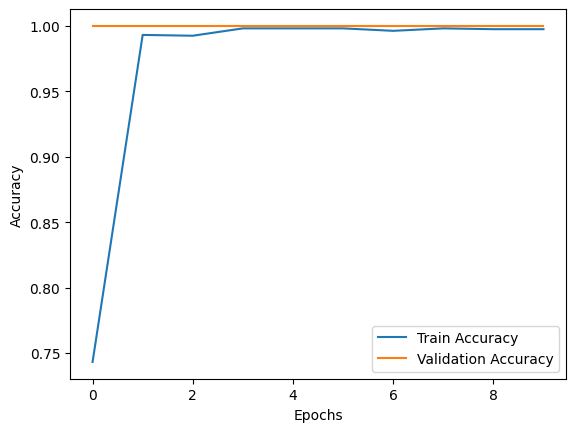

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.models import load_model

model = load_model("hand_gesture_model.h5")

def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    img = cv2.resize(img, (img_size, img_size))  
    img = img / 255.0  
    img = img.reshape(1, img_size, img_size, 1)  
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_name = classes[class_idx]
    print(f"Predicted class: {class_name}")

test_image_path = "C:/Users/akshi/OneDrive/Desktop/PRODIGY/PRODIGY_ML_04/frame_03_05_0005.png"  
predict_image(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted class: 07_ok
